In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
turnout_age = pd.read_csv("CPS Turnout Rates - Age.csv")
print(turnout_age.head())
print(turnout_age.columns)

state_age2023 = pd.read_excel("ACSST1Y2023.S0101-2024-11-06T034925.xlsx")
print(state_age2023.head(10))
print(state_age2023.columns)

state_age2023_all = pd.read_csv("ACSST1Y2023.S0101-2024-11-07T210933.csv")
print(state_age2023_all.head(21))
print(state_age2023_all.columns)

turnout_state = pd.read_csv("voter-turnout-by-state-2024.csv")
print(turnout_state)
print(turnout_state.columns)

  Turnout Rate   2022   2020   2018   2016   2014   2012   2010   2008   2006  \
0        18-29  25.5%  52.5%  32.6%  43.4%  16.3%  40.9%  20.3%  48.4%  20.3%   
1        30-44  40.1%  64.4%  45.8%  56.9%  30.1%  56.2%  36.1%  60.7%  36.3%   
2        45-59  52.3%  72.9%  56.2%  66.2%  42.6%  66.0%  50.4%  69.5%  50.4%   
3          60+  63.1%  78.0%  65.5%  71.4%  54.9%  71.2%  59.0%  71.0%  57.6%   

    2004   2002   2000   1998   1996   1994   1992   1990   1988   1986  
0  45.0%  18.2%  34.5%  17.7%  33.1%  21.0%  42.7%  20.0%  35.7%  20.5%  
1  59.5%  36.0%  54.0%  35.1%  50.5%  39.4%  59.0%  38.7%  54.2%  38.5%  
2  69.0%  50.1%  64.3%  49.1%  62.5%  52.9%  68.0%  49.3%  64.7%  50.1%  
3  69.7%  57.1%  67.3%  55.6%  65.7%  57.2%  68.0%  53.7%  64.7%  53.8%  
Index(['Turnout Rate', '2022', '2020', '2018', '2016', '2014', '2012', '2010',
       '2008', '2006', '2004', '2002', '2000', '1998', '1996', '1994', '1992',
       '1990', '1988', '1986'],
      dtype='object')
         Unn

<function matplotlib.pyplot.show(close=None, block=None)>

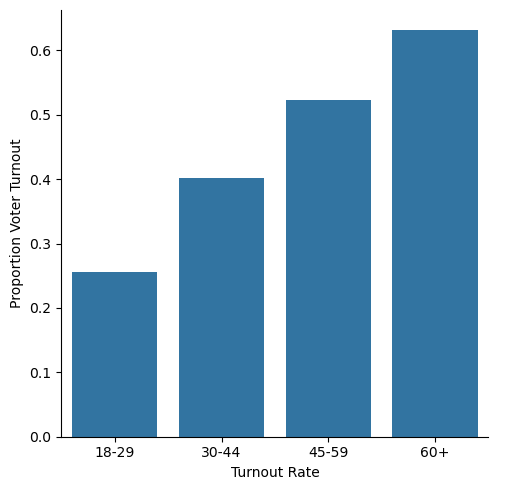

In [48]:
sns.catplot(kind = "bar", data=turnout_age, x = "Turnout Rate", y = "2022")
plt.ylabel('Proportion Voter Turnout')
plt.show

In [3]:
turnout_age.iloc[:, 1:] = turnout_age.iloc[:, 1:].replace('%', '', regex = True).astype(float)/100

In [4]:
turnout_state = turnout_state.drop(51)

In [5]:
state_age2023 = state_age2023.loc[6:19, :]
pattern = r"(\d+)(?: to (\d+))?"
state_age2023[['start_age', 'end_age']] = state_age2023['Unnamed: 0'].str.extract(pattern).astype(float)


age_bins = [20, 30, 45, 60, 100]  
age_labels = ['18-29', '30-44', '45-59', '60+']  

def get_age_group(row):
    start_age = row['start_age']
    end_age = row['end_age'] if pd.notna(row['end_age']) else start_age
    
    age_group = pd.cut([start_age], bins=age_bins, labels=age_labels, right=False) 
    new_age_range = age_group[0]
    
    if new_age_range == '18-29':
        row['start_age'] = 20
        row['end_age'] = 29
    elif new_age_range == '30-44':
        row['start_age'] = 30
        row['end_age'] = 44
    elif new_age_range == '45-59':
        row['start_age'] = 45
        row['end_age'] = 59
    elif new_age_range == '60+':
        row['start_age'] = 60
        row['end_age'] = None
    row['Matched Age Range'] = new_age_range
    return row

state_age2023 = state_age2023.apply(get_age_group, axis=1)
#print(state_age2023)
state_columns = state_age2023.filter(regex='^(?!start_age|end_age|Matched Age Range|Unnamed: 0)')
grouped = state_age2023.groupby('Matched Age Range').agg(
    {'start_age': 'first',
     'end_age': 'first',
     **{col: 'sum' for col in state_columns.columns}})

print(grouped)


                   start_age  end_age  Alabama  Alaska  Arizona  Arkansas  \
Matched Age Range                                                           
18-29                     20     29.0    0.126   0.143    0.135     0.128   
30-44                     30     44.0    0.192   0.227    0.197     0.196   
45-59                     45     59.0    0.182   0.167    0.172     0.174   
60+                       60      NaN    0.249   0.205    0.257     0.245   

                   California  Colorado  Connecticut  Delaware  ...  \
Matched Age Range                                               ...   
18-29                   0.134     0.141        0.125     0.116  ...   
30-44                   0.216     0.231        0.194     0.189  ...   
45-59                   0.185     0.176        0.189     0.175  ...   
60+                     0.221     0.223        0.264     0.288  ...   

                   South Dakota  Tennessee  Texas   Utah  Vermont  Virginia  \
Matched Age Range              

In [6]:
state_age2023_all2 = state_age2023_all.loc[6:19, :]
state_age2023_all2 = state_age2023_all2.filter(regex=r'^(?!.*Margin of Error$).*')
#print(state_age2023_all)

#print(state_age2023_all)
pattern = r"(\d+)(?: to (\d+))?"
state_age2023_all2[['start_age', 'end_age']] = state_age2023_all2['Label (Grouping)'].str.extract(pattern).astype(float)


age_bins = [20, 30, 45, 60, 100]  
age_labels = ['18-29', '30-44', '45-59', '60+']  

def get_age_group(row):
    start_age = row['start_age']
    end_age = row['end_age'] if pd.notna(row['end_age']) else start_age
    
    age_group = pd.cut([start_age], bins=age_bins, labels=age_labels, right=False) 
    new_age_range = age_group[0]
    
    if new_age_range == '18-29':
        row['start_age'] = 20
        row['end_age'] = 29
    elif new_age_range == '30-44':
        row['start_age'] = 30
        row['end_age'] = 44
    elif new_age_range == '45-59':
        row['start_age'] = 45
        row['end_age'] = 59
    elif new_age_range == '60+':
        row['start_age'] = 60
        row['end_age'] = None
    row['Matched Age Range'] = new_age_range
    return row

state_age2023_all2 = state_age2023_all2.apply(get_age_group, axis=1)
state_columns = state_age2023_all2.filter(regex=r'^(?!.*\b(?:[A-Za-z]+)\b!!(?:Total|Percent)!!Margin of Error$)(?!.*\bLabel \(Grouping\)\b)(?!start_age|end_age|Matched Age Range).*$')

state_columns = state_columns.iloc[:, 1:]


state_age2023_all2[state_columns.columns] = state_age2023_all2[state_columns.columns].replace({',': '', '%': ''}, regex=True)
state_age2023_all2[state_columns.columns] = state_age2023_all2[state_columns.columns].astype(float)



state_age2023_all2[state_columns.columns] = state_age2023_all2[state_columns.columns].astype(float)

grouped_all = state_age2023_all2.groupby('Matched Age Range').agg(
    {'start_age': 'first',
     'end_age': 'first',
     **{col: 'sum' for col in state_columns.columns}})

mask = grouped_all.filter(regex=r'^[A-Za-z\s]+!!Percent!!Estimate$').columns
grouped_all[mask] = grouped_all[mask]/100
grouped_all = grouped_all.drop(grouped_all.columns[-2:], axis=1)
print(grouped_all)


                   start_age  end_age  Alabama!!Total!!Estimate  \
Matched Age Range                                                 
18-29                     20     29.0                  647678.0   
30-44                     30     44.0                  979886.0   
45-59                     45     59.0                  928973.0   
60+                       60      NaN                 1276225.0   

                   Alabama!!Percent!!Estimate  Alaska!!Total!!Estimate  \
Matched Age Range                                                        
18-29                                   0.126                 105061.0   
30-44                                   0.192                 166654.0   
45-59                                   0.182                 122153.0   
60+                                     0.249                 149758.0   

                   Alaska!!Percent!!Estimate  Arizona!!Total!!Estimate  \
Matched Age Range                                                        
18-2

In [7]:
total_columns = grouped_all.columns[grouped_all.columns.str.contains('Total')]
percent_columns = grouped_all.columns[grouped_all.columns.str.contains('Percent')]

df_reset = grouped_all.reset_index()

total_df = df_reset.melt(id_vars=["Matched Age Range"], value_vars=total_columns, var_name="State", value_name="Total Estimate")

percent_df = df_reset.melt(id_vars=["Matched Age Range"], value_vars=percent_columns, var_name="State", value_name="Percent Estimate")

total_df['State'] = total_df['State'].str.replace('!!Total!!Estimate', '')
percent_df['State'] = percent_df['State'].str.replace('!!Percent!!Estimate', '')

final_df = pd.merge(total_df[['Matched Age Range', 'State', 'Total Estimate']], 
                     percent_df[['Matched Age Range', 'State', 'Percent Estimate']], 
                     on=["Matched Age Range", "State"])

final_df = final_df[['Matched Age Range', 'State', 'Total Estimate', 'Percent Estimate']]

print(final_df)


    Matched Age Range      State  Total Estimate  Percent Estimate
0               18-29    Alabama        647678.0             0.126
1               30-44    Alabama        979886.0             0.192
2               45-59    Alabama        928973.0             0.182
3                 60+    Alabama       1276225.0             0.249
4               18-29     Alaska        105061.0             0.143
..                ...        ...             ...               ...
199               60+  Wisconsin       1552580.0             0.263
200             18-29    Wyoming         70944.0             0.121
201             30-44    Wyoming        122182.0             0.209
202             45-59    Wyoming         92425.0             0.159
203               60+    Wyoming        152872.0             0.262

[204 rows x 4 columns]


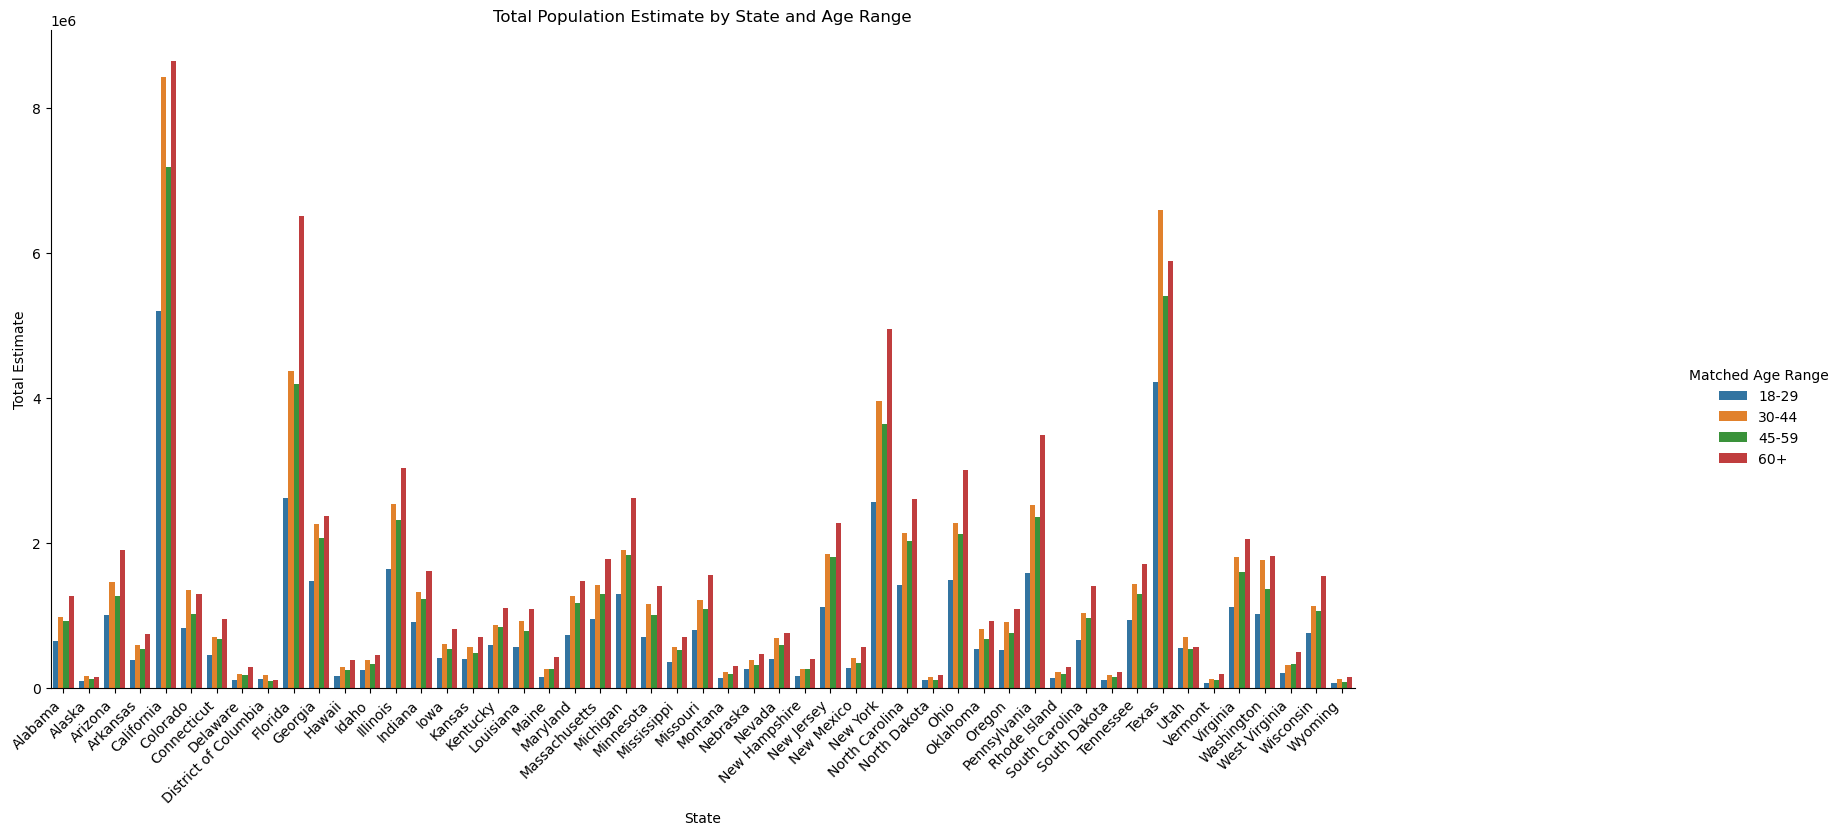

In [44]:

# Assuming final_df is your DataFrame
g = sns.catplot(data=final_df, kind="bar", x="State", y="Total Estimate", hue="Matched Age Range")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Increase the size of the plot to accommodate labels
g.fig.set_size_inches(20, 8)

# Set title and labels
plt.title('Total Population Estimate by State and Age Range')
plt.xlabel('State')
plt.ylabel('Total Estimate')

# Adjust legend position to avoid being cut off
# The legend is now being handled by the FacetGrid, so we need to use g.legend.set()
#g.legend.set(loc='upper left', bbox_to_anchor=(1.05, 1), title='Age Range')

# Show the plot
plt.show()

In [8]:
total_pop = final_df.groupby('State')['Total Estimate'].sum().reset_index()
total_pop = total_pop.rename(columns={'Total Estimate': 'Total Pop'})
print(total_pop)

                   State   Total Pop
0                Alabama   3832762.0
1                 Alaska    543626.0
2                Arizona   5648851.0
3               Arkansas   2281969.0
4             California  29484949.0
5               Colorado   4514469.0
6            Connecticut   2792139.0
7               Delaware    792830.0
8   District of Columbia    533847.0
9                Florida  17707477.0
10               Georgia   8192473.0
11                Hawaii   1110630.0
12                 Idaho   1438986.0
13              Illinois   9528069.0
14               Indiana   5088556.0
15                  Iowa   2388901.0
16                Kansas   2170497.0
17              Kentucky   3407474.0
18             Louisiana   3396279.0
19                 Maine   1116867.0
20              Maryland   4665144.0
21         Massachusetts   5454496.0
22              Michigan   7667771.0
23             Minnesota   4290413.0
24           Mississippi   2173049.0
25              Missouri   4661810.0
2

In [9]:
# can use for graph!
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
merge_turnout = pd.merge(final_df, turnout_age, left_on='Matched Age Range', right_on='Turnout Rate')
#merge_turnout = pd.merge(merge_turnout, turnout_state, left_on = "State", right_on = "state")
merge_turnout = pd.merge(merge_turnout, total_pop, on = "State")
#merge_turnout["predicted state turnout"] = (merge_turnout["Total Estimate"] * merge_turnout["2022"])/merge_turnout["VotingAgePop2020"]
merge_turnout["predicted state turnout"] = (merge_turnout["Total Estimate"] * merge_turnout["2022"])/merge_turnout["Total Estimate"]

print(merge_turnout)


# Use for prediction!
sum_turnout_by_state = merge_turnout.groupby('State')['predicted state turnout'].sum().reset_index()
baseline = np.full_like(sum_turnout_by_state["predicted state turnout"], np.mean(turnout_state["eligTurnoutRateTB"]))

print(mean_squared_error(turnout_state["eligTurnoutRateTB"], sum_turnout_by_state["predicted state turnout"]))
print(r2_score(turnout_state["eligTurnoutRateTB"], sum_turnout_by_state["predicted state turnout"]))

print(mean_squared_error(turnout_state["eligTurnoutRateTB"], baseline))
print(r2_score(turnout_state["eligTurnoutRateTB"], baseline))

    Matched Age Range      State  Total Estimate  Percent Estimate  \
0               18-29    Alabama        647678.0             0.126   
1               30-44    Alabama        979886.0             0.192   
2               45-59    Alabama        928973.0             0.182   
3                 60+    Alabama       1276225.0             0.249   
4               18-29     Alaska        105061.0             0.143   
..                ...        ...             ...               ...   
199               60+  Wisconsin       1552580.0             0.263   
200             18-29    Wyoming         70944.0             0.121   
201             30-44    Wyoming        122182.0             0.209   
202             45-59    Wyoming         92425.0             0.159   
203               60+    Wyoming        152872.0             0.262   

    Turnout Rate   2022   2020   2018   2016   2014  ...   2000   1998   1996  \
0          18-29  0.255  0.525  0.326  0.434  0.163  ...  0.345  0.177  0.331 

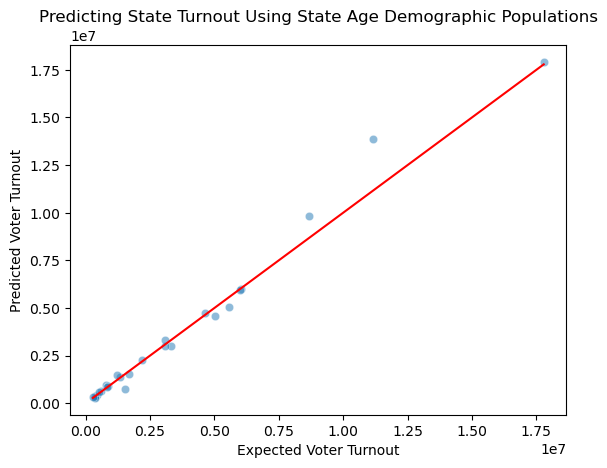

385979220298.7755
0.9759174879666458


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

pivot = grouped_all.drop(columns=['start_age', 'end_age'])
pivot = pivot.drop(columns=pivot.columns[pivot.columns.str.contains("Percent")])

pivot = pivot.reset_index()
pivot = pivot.melt(id_vars=['Matched Age Range'], var_name='state', value_name='value')
pivot['state'] = pivot['state'].str.replace('!!Total!!Estimate', '')
pivot = pivot.pivot_table(index='state', columns='Matched Age Range', values='value', aggfunc='first')

total = pd.merge(pivot, turnout_state, on = "state")

target = total["TotalBallotsCounted2020"].values
data = total[["18-29", "30-44", "45-59", "60+"]].values

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.5, random_state=999)

lin_model = LinearRegression()
lin_model.fit(X = train_data, y = train_target)
predictions = lin_model.predict(test_data)


sns.scatterplot(x = test_target, y = predictions, alpha =0.5)
x_line = np.array([min(test_target), max(test_target)])
y_line = x_line 
plt.plot(x_line, y_line, color='red')

# Set axis labels using matplotlib
plt.xlabel('Expected Voter Turnout')  # Set x-axis label
plt.ylabel('Predicted Voter Turnout')  # Set y-axis label
plt.title('Predicting State Turnout Using State Age Demographic Populations')

# Show the plot
plt.show()

print(mean_squared_error(test_target, predictions))
print(r2_score(test_target, predictions))

                   state  18-29  30-44  45-59    60+  TotalBallotsCounted2020  \
0                Alabama  0.126  0.192  0.182  0.249                2325000.0   
1                 Alaska  0.143  0.227  0.167  0.205                 361400.0   
2                Arizona  0.135  0.197  0.172  0.257                3420585.0   
3               Arkansas  0.128  0.196  0.174  0.245                1223675.0   
4             California  0.134  0.216  0.185  0.221               17785151.0   
5               Colorado  0.141  0.231  0.176  0.223                3295666.0   
6            Connecticut  0.125  0.194  0.189  0.264                1861086.0   
7               Delaware  0.116  0.189  0.175  0.288                 509241.0   
8   District of Columbia  0.178  0.278  0.153  0.178                 346491.0   
9                Florida  0.116  0.193  0.185  0.288               11144855.0   
10               Georgia  0.134  0.206  0.189  0.214                5023159.0   
11                Hawaii  0.

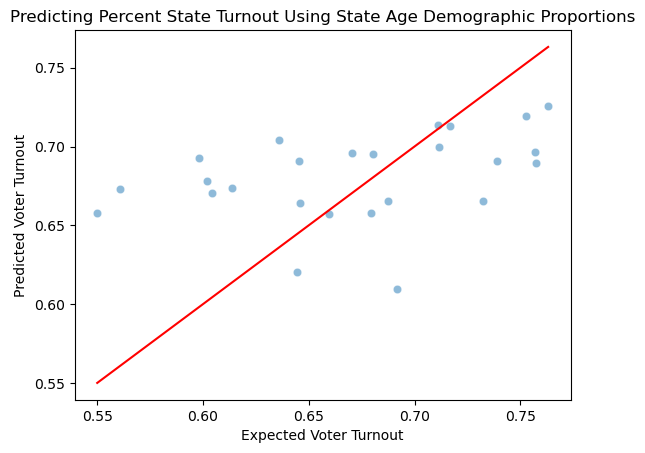

0.003235997801885931
0.12724391496454135


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

pivot = grouped.drop(columns=['start_age', 'end_age'])
pivot = pivot.reset_index()
pivot = pivot.melt(id_vars=['Matched Age Range'], var_name='state', value_name='value')
pivot = pivot.pivot_table(index='state', columns='Matched Age Range', values='value', aggfunc='first')


total = pd.merge(pivot, turnout_state, on = "state")
print(total)

target = total["eligTurnoutRateTB"].values
data = total[["18-29", "30-44", "45-59", "60+"]].values

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.5, random_state=999)

lin_model = LinearRegression()
lin_model.fit(X = train_data, y = train_target)
predictions = lin_model.predict(test_data)

sns.scatterplot(x = test_target, y = predictions, alpha =0.5)


x_line = np.array([min(test_target), max(test_target)])
y_line = x_line 
plt.plot(x_line, y_line, color='red')

# Set axis labels using matplotlib
plt.xlabel('Expected Voter Turnout')  # Set x-axis label
plt.ylabel('Predicted Voter Turnout')  # Set y-axis label
plt.title('Predicting Percent State Turnout Using State Age Demographic Proportions')

# Show the plot
plt.show()

print(mean_squared_error(test_target, predictions))
print(r2_score(test_target, predictions))